In [1]:
# change dir
import os
if not os.path.exists('scripts'):
    os.chdir('../../')

<Axes: title={'center': 'Plot Title'}, xlabel='QPS', ylabel='Latency 95th Percentile'>

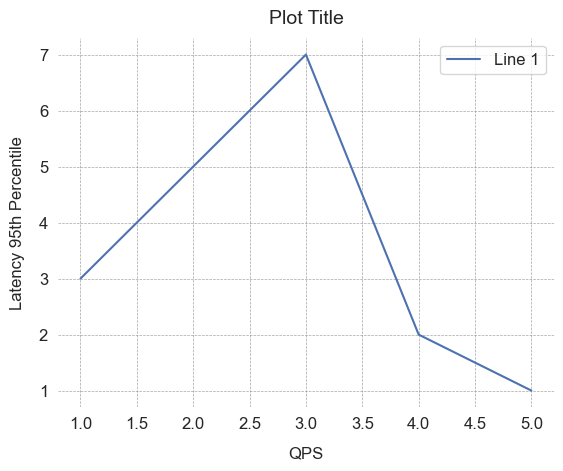

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set a pleasing color palette
sns.set_palette("deep")  # Choose a different palette from the Seaborn documentation
# Set a base style 
sns.set_style("whitegrid")  # Other options include "darkgrid", "ticks" etc.

# Increase font size for better readability
plt.rcParams["font.size"] = 12
# Use a nicer font (optional)
plt.rcParams["font.family"] = "Arial"

# Adjust grid line properties
plt.grid(linestyle="--", linewidth=0.5, color="gray", which="both", alpha=0.7)
# Thicker axes lines for emphasis
sns.despine(left=True, bottom=True)  # Removes top and right spines
# Customize x and y-axis labels
plt.xlabel("QPS", labelpad=10, fontsize=12)  # Adjust labelpad and fontsize
plt.ylabel("Latency 95th Percentile", labelpad=10, fontsize=12)
# Adjust legend title and labels
# plt.legend(title="Legend Title", loc="upper left", bbox_to_anchor=(1.05, 1), fontsize=10)
plt.title("Plot Title", fontsize=14, pad=10)  # Adjust pad for spacing

# Generate some sample data
x = [1, 2, 3, 4, 5]
y = [3, 5, 7, 2, 1]

# Create a line plot with a title and labels and axis labels
sns.lineplot(x=x, y=y, label="Line 1")


In [5]:
import pandas as pd
import re

In [9]:
from scripts.utils import *

df1 = load_run_data("results/ibench-cpu/run_1.txt")
df2 = load_run_data("results/ibench-cpu/run_2.txt")
df3 = load_run_data("results/ibench-cpu/run_3.txt")

In [35]:
import numpy as np
df1['p95'] = df1['p95'] / 1000 # convert to ms
df2['p95'] = df2['p95'] / 1000 # convert to ms
df3['p95'] = df3['p95'] / 1000 # convert to ms
p95_mean= np.mean(np.array([df1['p95'], df2['p95'], df3['p95']]), axis=0)
p95_std = np.std(np.array([df1['p95'], df2['p95'], df3['p95']]), axis=0)
qps_mean = np.mean(np.array([df1['QPS'], df2['QPS'], df3['QPS']]), axis=0)
qps_std = np.std(np.array([df1['QPS'], df2['QPS'], df3['QPS']]), axis=0)

In [36]:
p95_mean

array([4.03633333, 3.86893333, 3.45536667, 3.06046667, 2.70346667,
       7.12306667, 6.4318    , 6.39676667, 7.2077    , 6.22296667,
       6.81446667])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<ErrorbarContainer object of 3 artists>

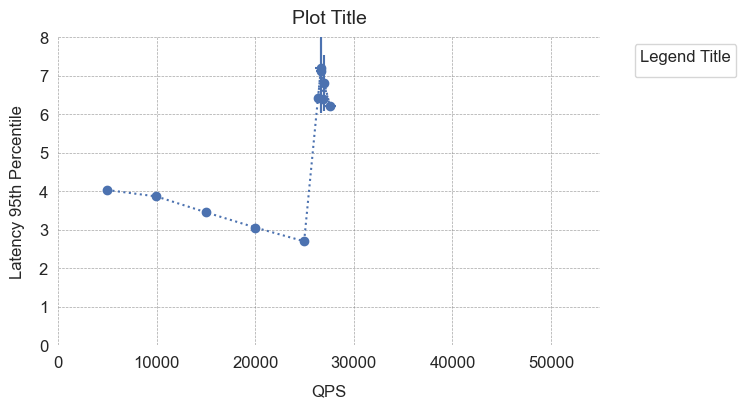

In [42]:
fig, ax = plt.subplots(figsize=(7, 4))
sns.set_palette("deep")  # Choose a different palette from the Seaborn documentation
sns.set_style("whitegrid")  # Other options include "darkgrid", "ticks" etc.
plt.rcParams["font.size"] = 12
plt.rcParams["font.family"] = "Arial"
# Adjust grid line properties
plt.grid(linestyle="--", linewidth=0.5, color="gray", which="both", alpha=0.7)
# Thicker axes lines for emphasis
sns.despine(left=True, bottom=True)  # Removes top and right spines
# Customize x and y-axis labels
plt.xlabel("QPS", labelpad=10, fontsize=12)  # Adjust labelpad and fontsize
plt.ylabel("Latency 95th Percentile", labelpad=10, fontsize=12)
# Adjust legend title and labels
plt.legend(title="Legend Title", loc="upper left", bbox_to_anchor=(1.05, 1), fontsize=10)
plt.title("Plot Title", fontsize=14, pad=10)  # Adjust pad for spacing
ax.set_xlim(left=0, right=55e3)
ax.set_ylim(bottom=0, top=8)
ax.errorbar(qps_mean, p95_mean, xerr=qps_std, yerr=p95_std, linestyle='dotted', marker='o', label="CPU")